### Understanding Attention Mechanisms

Attention mechanisms have revolutionized the field of natural language processing and computer vision by allowing models to focus on specific parts of the input data when making predictions. Here's an overview, along with markdown explanations, code examples, and visualizations.

#### What is Attention?

Attention allows a model to weigh the importance of different parts of the input data differently. This is particularly useful when dealing with sequences or images, where certain parts of the input might be more relevant for the task at hand than others.

### Self-Attention in Transformers

The self-attention mechanism is a key component of transformer models like BERT and GPT. It allows the model to look at other words in the sentence when encoding a particular word.

#### Steps of Self-Attention

1. **Input Representation**: Convert input tokens to embeddings.
2. **Query, Key, and Value Vectors**: For each token, create three vectors: Query (Q), Key (K), and Value (V).
3. **Attention Scores**: Compute attention scores using dot product of Q and K, followed by scaling and softmax.
4. **Weighted Sum**: Use the attention scores to compute a weighted sum of the value vectors.

### Example: Self-Attention Mechanism

#### Step-by-Step Explanation of Self-Attention

1. **Input Representation**:
   - Convert each token in the input sequence to its corresponding embedding vector.

2. **Query, Key, and Value Vectors**:
   - For each token embedding, create three vectors: Query (Q), Key (K), and Value (V) using learned weight matrices.

3. **Attention Scores**:
   - Compute attention scores by taking the dot product of the Query vector with all Key vectors.
   - Scale the scores by the square root of the dimensionality of the Key vectors.
   - Apply a softmax function to obtain normalized attention weights.

4. **Weighted Sum**:
   - Compute the weighted sum of the Value vectors using the attention weights to produce the final output for each token.


In [6]:
import torch
import torch.nn.functional as F

# Example input (batch_size=1, seq_len=3, embed_dim=4)
x = torch.tensor([[[1.0, 0.0, 1.0, 0.0],
                   [0.0, 2.0, 0.0, 2.0],
                   [1.0, 1.0, 1.0, 1.0]]])

# Initialize query, key, value weight matrices
W_q = torch.nn.Linear(4, 4, bias=False)
W_k = torch.nn.Linear(4, 4, bias=False)
W_v = torch.nn.Linear(4, 4, bias=False)

# Compute query, key, value matrices
Q = W_q(x)  # (1, 3, 4)
K = W_k(x)  # (1, 3, 4)
V = W_v(x)  # (1, 3, 4)

# Compute attention scores
attention_scores = torch.matmul(Q, K.transpose(-2, -1))  # (1, 3, 3)
attention_scores = attention_scores / (4 ** 0.5)  # Scaling

# Apply softmax to obtain attention weights
attention_weights = F.softmax(attention_scores, dim=-1)  # (1, 3, 3)

# Compute weighted sum of value vectors
output = torch.matmul(attention_weights, V)  # (1, 3, 4)

print("Attention Weights:\n", attention_weights)
print("Output:\n", output)

Attention Weights:
 tensor([[[0.3651, 0.2964, 0.3385],
         [0.6297, 0.0678, 0.3026],
         [0.5238, 0.1395, 0.3367]]], grad_fn=<SoftmaxBackward0>)
Output:
 tensor([[[ 0.1501,  0.6861,  0.5080, -0.5340],
         [ 0.1742,  0.5091,  0.5989, -0.7344],
         [ 0.1673,  0.5761,  0.5725, -0.6707]]], grad_fn=<UnsafeViewBackward0>)


Visualizing Self-Attention with PCA To understand how attention works, we can visualize the attention weights. Here’s an example of how to plot the attention weight

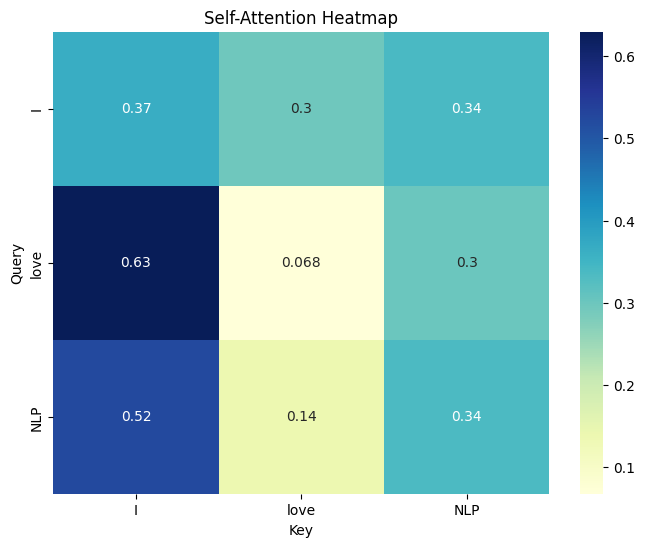

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example words (for visualization purposes)
words = ["I", "love", "NLP"]

# Convert attention weights to numpy
attention_weights_np = attention_weights.detach().numpy().squeeze()

# Plot the attention weights
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights_np, xticklabels=words, yticklabels=words, cmap="YlGnBu", annot=True)
plt.title("Self-Attention Heatmap")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


### Visualizing Self-Attention with a Heatmap

To understand how attention works, we can visualize the attention weights using a heatmap. Here’s how to interpret the heatmap:

#### What is a Heatmap?

A heatmap is a graphical representation of data where individual values are represented as colors. In the context of self-attention, a heatmap can show how much each word (query) attends to every other word (key) in the input sequence.

#### Components of the Heatmap

1. **Axes**:
   - **X-axis (Key)**: Represents the words in the sequence that the model attends to.
   - **Y-axis (Query)**: Represents the words in the sequence for which the attention is being computed.

2. **Color Intensity**:
   - The color intensity represents the attention weight. A higher value (darker color) indicates that the model is paying more attention to that word pair (query, key).

#### Interpreting the Heatmap

- **Diagonal Elements**: These represent self-attention where the query and key are the same word.
- **Off-Diagonal Elements**: These indicate how much attention a query word pays to different key words.

#### Example Interpretation

In the provided heatmap:
- **"love" (query)** pays significant attention to **"I" (key)** and **"NLP" (key)**.
- **"I" (query)** has a balanced attention to all words including itself.
- **"NLP" (query)** also distributes its attention relatively evenly across all words.

### Conclusion

The heatmap provides a visual representation of the attention distribution across different words in a sequence. By analyzing the heatmap, we can understand which words are considered important by the model when processing each word in the sequence.


### Conclusion
Attention mechanisms, especially self-attention, allow models to dynamically focus on different parts of the input, making them extremely powerful for tasks involving sequences and images. Understanding and visualizing attention can provide insights into how models interpret and process data.

By implementing and visualizing attention, you can gain a deeper understanding of the inner workings of transformer models and their applications in tasks like plant disease classification.